# Máquina de Vectores Soporte para Clasificación Binaria

# Motivación

## Detección Fraudulenta en Tarjetas de Crédito

<img style="float: right;" src="credit1.png" width="500" height="500" >

Para las compañías emisoras de tarjetas de crédito es importante tener la capacidad de reconocer transacciones fraudulentas, es decir que los clientes no tengan cargos por compras no realizadas. Para éste fin se recopilan una serie de datos de diferentes transacciones. 

Para cada transacción se asocian distintas características como son: tiempo, monto de la transacción, número de transacciones anteriores, porcentaje respecto al crédito total, etc. A cada una de las transacciones se le asocia su etiqueta de si es fraudulenta la operación o no.

Fuente: <https://www.kaggle.com/mlg-ulb/creditcardfraud/home>




# Introducción

<img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/512px-Svm_separating_hyperplanes_%28SVG%29.svg.png" width="300" height="300" >

La máquina de vector soporte (**SVM** por sus siglas en inglés Support Vector Machine) es un algoritmo de aprendizaje supervisado el cuál es ampliamente usado para problemas de clasificación en *Machine Learning*.

La SVM fue introducida por Vladimir Vapnik y Alexey Chervonenkis en 1963 como un clasificador lineal para datos linealmente separables. En 1995 se formuló la extensión de éste clasificador al caso no-separable y tener tolerancia en la clasificación de datos. 

Este mismo año se desarolló la técnica para el caso no lineal. Para lograr esto, los datos de entrada son representados en una dimensión mayor donde pueden ser separados linealmente por un hiperplano.

# Clasificador Lineal: Caso Separable
## Producto Punto como Regla de Decisión

El producto punto de dos vectores tiene algunas propiedades geométricas interesantes. Considere dos vectores $x, \, y \in \mathbb{R}^n$, dónde $x_i$ es la $i$-ésima coordenada de $x$; el producto punto es definido por:

$$\langle x,y \rangle = x_1y_1 + \ldots + x_ny_n$$

Ésta fórmula, aunque simple, genera una característica muy interesante, la cuál es importante en *machine learning*, y es una regla de decisión muy conveniente.

En particular, suponga que estamos en el plano Euclidiano, y se tiene una línea $L$ que pasa a través del origen, con un vector unitario $w$ perpendicular a L. Vector **normal** a la línea $L$.

<img style="float: center;" src="https://jeremykun.files.wordpress.com/2017/05/decision-rule-1.png" width="300" height="300" >

Si se toma cualquier vector $x$, entonces el producto punto $\langle x, w \rangle$ es positivo si $x$ está del mismo lado que $w$ respecto a $L$, y negativo en caso contrario. El producto punto es cero, sí y sólo sí $x$ está exactamente en la línea $L$ (paralela), incluso cuando $x$ es el vector cero.

<img style="float: center;" src="https://jeremykun.files.wordpress.com/2017/05/decision-rule-2.png" width="500" height="800" >

El principal hecho para que esta propiedad funcione, es que el producto punto nos da un indicio de *cómo* un vector es proyectado en otro. Cuando se proyecta un vector $x$ en otro vector $w$, ésta proyección es la componente de $x$ que apunta en la misma dirección de $w$.

<img style="float: center;" src="https://jeremykun.files.wordpress.com/2017/05/decision-rule-3-e1495339586386.png" width="300" height="500" >

Si $w$ es un vector unitario, entonces la magnitud de la componente $a$ (proyección) es exactamente el producto punto $\langle x, w \rangle$. Más aún, si el ángulo entre $x$ y $w$ es mayor a $90^\circ$, el vector proyectado apuntará en la dirección opuesta de $w$, es decir que tendrá una magnitud con signo opuesto.

<http://j2kun.github.io/decision-rule/index.html>

Más técnicamente: Sean $x, \, y \in \mathbb{R}^n$ dos vectores, y sea $\langle x,y \rangle$ el producto punto. Defina $\lVert y\rVert = \sqrt{\langle y, y \rangle}$ la magnitud de $y$. Considere el vector unitario $y' = \frac{y}{\lVert y\rVert}$, entonces $\text{proy}_y(x) = \langle x,y' \rangle y'$. En otras palabras, el vector $y$ se escala a un vector unitario $y'$, este resultado se usa para calcular el producto punto, y finalmente se escala $y$ a una magnitud de $\langle x, y' \rangle$.

Una de las razones del **por qué** esta propiedad de regla de desición es tan importante, es debido a que es una función lineal, y este tipo de funciones pueden ser optimizadas relativamente fácil, en el sentido en que existen muchos algoritmos para optimizar funciones lineales. Esta es una razón de peso de por qué los matemáticos inician el proceso de modelado con funciones lineales. Son inherentemente más simples

## Formulando el Problema de Optimización en SVM

Sea $x \in \mathbb{R}^n$ un conjunto de puntos de datos de entrenamiento, y sea $y \in \{-1,+1\}$ su etiqueta de clasificación. Suponga que se desea encontrar el hiperplano que separa todos los puntos con etiqueta $-1$ de los puntos con etiqueta $+1$.

La hipótesis que se propone, es separar los puntos por medio de un subespacio lineal que divide todo $\mathbb{R}^n$ en dos mitades. El dato que representa este hiperplano (subescaio) es un vector $w$, normal al hiperplano, por lo que éste hiperplano está definido por la solución a la siguiente ecuación:
$$\langle x, w \rangle = 0.$$

Como se vió anteriormente, el vector $w$ posee la siguiente regla decisión para saber si un nuevo punto $z$ tiene una etiqueta positiva o negativa:
$$h_w(z) = \text{sign}(\langle w,x \rangle).$$

Se puede observar que esta fórmula sólo funciona para vectores normales al hiperplano que cruzan por el origen de coordenadas. Para tener la posibilidad de trabajar con puntos ubicados en cualquier lugar del espacio, se agrega un término fijo de desplazamiento $b \in \mathbb{R}$ (comúnmente llamado bias), por lo que el hiperplano ahora es establecido por en conjunto de soluciones a la ecuación
$$\langle x, w \rangle + b = 0,$$
y la regla de decisión se convierte en
$$h_w(z) = \text{sign}(\langle w,x \rangle+b).$$

Ahora la hipótesis es el par de vector-escalar $w, \, b$

La idea intituiva detrás de la formulación del problema de SVM es que existen muchos posibles hiperplanos separadores para un conjunto de datos etiquetados.

<img style="float: center;" src="https://jeremykun.files.wordpress.com/2017/05/svm_lots_of_choices.gif" width="600" height="800" >

### **¿Cómo encontrar el hiperplano separador que no solo separa los datos, si no que también generalice tan bien como sea posible nuevos datos?** 
R/ SVM encuentra el hiperplano que separa los datos y adicionalmente lo ubica tan lejos de cualquier punto de entrenamiento como sea posible.

Más específicamente, fije un conjunto de datos etiquetados $(x_i,\,y_i)$, más precisamente:
$$D = \{(x_i,\,y_i \} \mid i_1,\,\ldots,\, m, \, x_i \in \mathbb{R}^n, \, y_i \in \{-1,\, 1\},$$
y la hipótesis definida por el vector normal $w \in \mathbb{R}^n$ y el término de desplazamiento $b \in \mathbb{R}$

Suponga que $(w,\,b)$ define el hiperplano que separa correctamente todos los puntos de entrenamiento en dos clases etiquetadas. La medidad de la calidad es la magnitud de sus márgenes.

**Definición:** La márgen geométrica de un hiperplano $w$ con respecto al conjunto de datos $D$ es la distancia más corta de un punto de entrenamiento $x_i$ al hiperplano definido por $w$.

El mejor hiperplano es el que tiene la mayor márgen posible. Esta márgen puede ser fácilmente calculada con el producto punto. La distancia de $x$ al hiperplano definido por $w$ es la misma que la magnitud de la proyección de $x$ en $w$, la cuál es calculada con el producto punto.

<img style="float: center;" src="https://jeremykun.files.wordpress.com/2017/05/decision-rule-3-e1495339586386.png" width="300" height="500" >

Basado en lo visto anteriormente, el problema de optimización queda definido de la siguiente manera:
$$\begin{aligned} & \max_{w} \min_{x_i} \left | \left \langle x_i, \frac{w}{\lVert w\rVert} \right \rangle + b \right | & \\ \text{sujeto a}\quad & \text{sign}(\langle x_i, w \rangle + b) = \text{sign}(y_i) & \text{para todo} \; i = 1, \dots,\, m \end{aligned} $$

Esta formulación es complicada debido a su nolinealidad, en más detalle:
   * Las restricciones son no-lineales debido a la comparación de signos.
   * Tiene un mínimo y un máximo. En un principio, se debe hacer esto porque no se sabe cuál punto va a estar más cerca del hiperplano.
   * El objetivo es no-lineal: función valor absoluto.

Ahora el enfoque es convertir este problema de optimización en un problema de optimización en el cual las restricciones son todas desiguladades lineales y el objetivo es un polinomio cuadrático que se quiere minimizar o maximizar.

### Linealizando las Restricciones

Para resolver el primer problema, se desea saber si $\text{sign}(\langle x_i, w \rangle + b) = \text{sign}(y_i)$ para un punto de entrenamiento etiquetado $(x_i, \, y_i)$. Para este fin, multiplicamos ambos argumentos. Si tienen signos iguales, su producto será positivo, en otro caso será negativo. Esto se puede ver reflejado en la siguiente restricción:
$$(\langle x_i, w \rangle + b) \cdot y_i \geq 0.$$

Note que esta restricción sigue clasificando a $x_i$ incluso si $w$ es escalado (es más largo que un vector unitario). Es decir, el signo del producto punto es independiente de cómo $w$ es escalado.

### Eliminando el $\max + \min$

Para eliminar este problema, se usa el hecho de que la hipótesis, la cuál viene en forma de vector normal $w$, tiene un grado de libertad en su magnitud. En la animación de abajo, se puede observar como cambia la magnitud del vector normal sin que cambie el lìmite de decisión.

<img style="float: center;" src="https://jeremykun.files.wordpress.com/2017/05/svm_w_length.gif?w=575&zoom=2" width="500" height="500" >

Se combinará esta característica con la anterior. Si aumentamos la magnitud de $w$, esto significa que el valor abosulto del producto punto $\langle x_i, w \rangle$ usado en las restricciones, incrementará en la misma cantidad (sin cambiar el signo). Es decir, para cualquier vector $a$, se tiene que $\langle a, w \rangle = \rVert w \lVert \cdot \langle a, w / \| w \| \rangle$. Bajo estas condiciones, la medida dada por el producto punto de la distancia del punto al hiperplano ya no es válida. La verdadera distancia es $\langle a, w / \lVert w \rVert \rangle$, y la distancia medida por $\langle a, w  \rangle$ es en unidades de $1/\lVert w\rVert$.

Suponga que se tiene el hiperplano óptimo y su normal $w$. No importa que tan lejos (o cerca) esté el punto de entrenamiento positivo $x$ más cercano, se podrá escalar la magnitud de $w$ para forzar que $\langle x, w \rangle = 1$. Por lo que la distancia de $x$ al hiperplano es $\frac{1}{\| w \|} = \langle x, w / \| w \| \rangle.$

En particula, si se obliga al punto más cercano a tener un producto punto de $1$, entonces todos los demás puntos tendrán al menos un producto punto igual a uno. Ésto tiene dos consecuencias:

1. La restricción cambia a $\langle x_i, w \rangle \cdot y_i \geq 1$ en vez de $\geq0$.
2. No se debe preguntar más cuál es el punto más cercano al hiperplano candidato, porque ya no se debe preocupar por qué tan lejos está el punto más cercano; ahora se sabe que está a una distancia de $1/\lVert w\rVert$ exactamente. En efecto, si los puntos óptimos no tienen ésta distancia, entonces significa que el punto más cercano no cumple las condiciones, i.e. que  $\langle x,\, w \rangle > 1$ para todo punto de entrenamiento $x$. Entonces se escalaría $w$ hasta que $\langle x,\, w \rangle = 1$, y por lo tanto se incrementa la márgen $1 / \lVert w \rVert$.

En otras palabras, el objetivo de optmización es solamente maximizar $1/\lVert w\rVert$, o también minimizar $\lVert w\rVert$.

<http://j2kun.github.io/svm-primal/index.html>

Para simplificar finalmente, no se minimizará $\lVert w\rVert$ debido a que incluye raíz cuadrada, en su lugar se minimizará su cuadrado $\lVert w \rVert^2 = \sum_j w_j^2$, y se multiplicará por un factor de $1/2$.

## Forma final del problema

El problema de optimización finalmete queda definido por

$$ \begin{aligned} & \min_{w,b}  \frac{1}{2} \| w \|^2 & \\ \text{sujeto a} \quad & (\langle x_i, w \rangle + b) \cdot y_i \geq 1 & \text{para todo} \; i = 1,\, \dots,\, m \end{aligned}$$

Éste es mucho más simple de analizar. Las restricciones son todas desiguldades lineales. El objetivo a minimizar es una función cuadrática convexa de las variables de entrada (suma de los cuadrados de las entradas). Dichos problemas son generalmente llamados problemas de programación cuadrática.

## Vectores Soporte

Si $w$ es el vector normal al hiperplano óptimo separador, los puntos de entrenamiento más cercanos cumplen que $\langle x_i, w \rangle + b = \pm 1$. Estos puntos más cercanos son los que reciben el nombre de **Vectores Soportes**, estos debido a que el hiperplano óptimo no depende de todos los puntos de entrenamientos, si no de los puntos más cercanos.

## Clasificador lineal: Caso no-separable

<img style="float: right;" src="soft.png" width="500" height="500" >

Muchos de los problemas de clasificación en la vida real, son datos no-seprabales (ya bien sean lineales o no). El caso de datos no-separables linealmente ocurre debido a la sobreposición de algunos datos entre las dos clases, por lo que se deben tolerar errores de clasificación. Esto se logra agregando al problema de optimización unas variables de holgura $\xi_i\geq 0$:
$$ (\langle x_i, w \rangle+b) \cdot y_i \geq 1 - \xi_i$$
y el problema de optimización queda definido por:
$$ \begin{aligned} & \min_{w,b,\xi}  \frac{1}{2} \| w \|^2 + c \sum_{i}\xi_i& \\ \text{sujeto a} \quad & (\langle x_i, w \rangle+b) \cdot y_i \geq 1 - \xi_i & \text{para todo} \; i = 1,\, \dots,\, m \\ & \xi_i\geq 0\end{aligned}$$
con $c$ una constante real positiva. Entre más grande $c$ menos tolerancia al error se tendrá, de igual manera entre más pequeña la variable $c$, más grande será la tolerancia.

## Clasificador no lineal

<img style="float: center;" src="https://www.hackerearth.com/blog/wp-content/uploads/2017/02/kernel.png" width="500" height="500" >

Un importante progreso en la teoría de SVM fue la extensión del clasificador lineal a un clasificador no lineal. Para lograr ésto, los datos de entrada son transformados a un espacio de mayor dimensión a través de un mapeo no lineal $\varphi(x)$ en donde puedan ser separados linealmente. Este "*truco*" es conocido como "**el truco del kernel**".


Con ésta transformación, el problema de optimización queda definido como:
$$ \begin{aligned} & \min_{w,b,\xi}  \frac{1}{2} \| w \|^2 + c \sum_{i}\xi_i& \\ \text{sujeto a} \quad & (\langle \varphi(x_i), w \rangle+b) \cdot y_i \geq 1 - \xi_i & \text{para todo} \; i = 1,\, \dots,\, m \\ & \xi_i\geq 0\end{aligned}$$


<img style="float: center;" src="https://generalabstractnonsense.com/images/solutionDiagram.png" width="500" height="500" >

# Ejemplo
## Detección Fraudulenta en Tarjetas de Crédito

Retomando el ejemplo de las tarjetas de crédito, se consideran dos características cualquiera: 
   1. Valor de la compra.
   2. Número de compras anteriores.

Cada transacción va tener una etiqueta asociada: Fraudulenta (-1) ó No Fraudulenta (+1).

Del total de conjunto de datos, se toma el $80\%$ para entrenamiento (resolver el problema de optimización) y el resto $20\%$ se usa para validación del hiperplano separador.

Se considera que existe una transformación no lineal $\varphi$ que mapea los datos de entrada a un espacio donde son linealmente separables.

## Clasificador lineal con variables separables

In [1]:
# Importar librería numpy
import numpy as np

# Importar matplotlib.pyplot
import matplotlib as mpl
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Comando para que las gráficas salgan en la misma ventana
%matplotlib inline

# Importar librería de optimización
from cvxopt import matrix, solvers

n = 500                  # Número de datos
m = 2;                   # Dimensión de los datos
nt = int(0.8*n)          # Se toma el 80% de los datos para entrenamiento
nv = int(0.2*n)          # Se toma el resto 20% para validación


Xi_t = 4*np.random.rand(nt,m)      # Construye el conjunto de entrenamiento
Xi_v = 4*np.random.rand(nv,m)      # Construye el conjunto de validación

# Ecuación de la línea que divide los datos de la forma
# w'x + b = 0
bt =  -6                    
wt = np.array([[4.], [-1.]])
x1 = np.linspace(1,3,10)
y1 = (1/wt[1])*(-bt -(wt[0])*x1)

# Clasificando los puntos en sus respectivas clases
yi_t = np.sign(wt[0]*Xi_t[:,0]+wt[1]*Xi_t[:,1]+bt)
yi_v = np.sign(wt[0]*Xi_v[:,0]+wt[1]*Xi_v[:,1]+bt)

Se declaran las matrices que se requieren para resolver el problema de optimización asociado al SVM.

Se usa la librería `cvxopt` para resolver el problema de optimización cuadrática.

In [2]:
#Preparando las matrices para resolver el problema de optimización
c = 8000    #penality
P = matrix(np.r_[np.c_[np.eye(m),np.zeros((m,nt+1))],np.zeros((1+nt,m+nt+1))])
q = matrix(c*np.r_[np.zeros((m+1,1)),np.ones((nt,1))])
G = matrix(-(np.diag(yi_t)@(np.c_[Xi_t,np.ones((nt,1)),np.zeros((nt,nt))]) + np.c_[np.zeros((nt,m+1)),np.eye(nt)]))
h = matrix(-np.ones((nt,1)))
# Se agrega la cota inferior para las variables de holgura
LB = -np.zeros((nt,1))
I = -matrix(np.c_[np.zeros((nt,m+1)),np.eye(nt)])
G = matrix(np.r_[G,I])
h = matrix(np.r_[h,LB])

sol=solvers.qp(P, q, G, h)
w = np.array(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -2.2447e+10  1.0115e+10  3e+10  2e+04  8e+00
 1: -1.2523e+09 -1.3858e+09  5e+09  2e+03  9e-01
 2: -1.7101e+08 -2.9839e+08  8e+08  3e+02  1e-01
 3: -2.9571e+06 -6.2649e+07  2e+08  5e+01  3e-02
 4:  1.0764e+07 -1.1926e+07  4e+07  6e+00  3e-03
 5:  2.1165e+06 -1.6210e+06  4e+06  1e-12  2e-15
 6:  2.6675e+05 -2.3291e+05  5e+05  5e-13  1e-15
 7:  3.8023e+04 -3.3072e+04  7e+04  2e-13  9e-16
 8:  5.5676e+03 -4.5499e+03  1e+04  6e-14  5e-16
 9:  2.5483e+03 -1.6888e+03  4e+03  3e-14  3e-16
10:  3.6346e+03 -3.5906e+02  4e+03  3e-14  1e-15
11:  2.1347e+03  1.5848e+03  5e+02  2e-14  7e-16
12:  1.9881e+03  1.9819e+03  6e+00  2e-14  2e-15
13:  1.9862e+03  1.9861e+03  6e-02  2e-14  1e-15
14:  1.9861e+03  1.9861e+03  6e-04  2e-14  2e-15
Optimal solution found.


Se proce a graficar el hiperplano separador encontrado por el problema de optimización junto al conjunto de datos de entrenamiento.

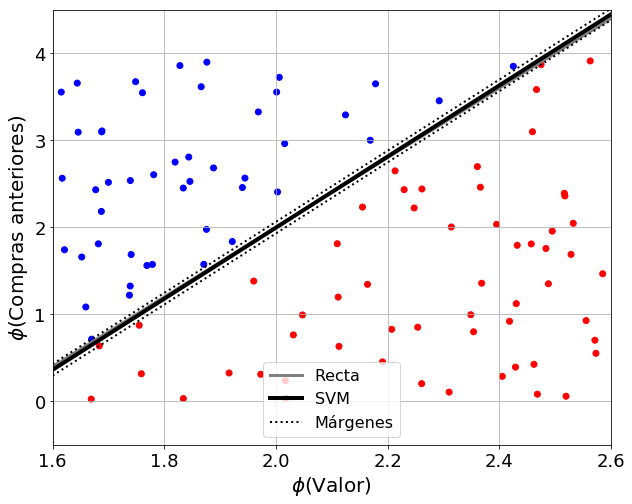

In [3]:
# Plot the training points
plt.figure(figsize=(10,8))
plt.scatter(Xi_t[:,0], Xi_t[:,1],c=yi_t,marker='o',cmap=cm.bwr)
plt.plot(x1,y1,'0.5',label='Recta',linewidth=3) 

# Plot the plane find by the SVM train
x2 = np.linspace(1,3,20)
y2 = (1/w[1])*(-w[2] -(w[0])*x2)
plt.plot(x2,y2,'k',label='SVM',linewidth=4)


# Plot the margins
YUP=(1-w[0]*x2-w[2])/w[1] #Margin 
plt.plot(x2,YUP,'k:',label = 'Márgenes',linewidth=2) 
YLOW=(-1-w[0]*x2-w[2])/w[1]     #Margin 
plt.plot(x2,YLOW,'k:',linewidth=2) 
plt.grid()
plt.legend(loc='best',prop={'size': 16})
plt.axis([1.6,2.6,-0.5,4.5])
plt.xlabel('$\phi$(Valor)',fontsize = 20)
plt.ylabel('$\phi$(Compras anteriores)',fontsize = 20)
plt.show()

Se grafican los datos de validación y el hiperplano separador.


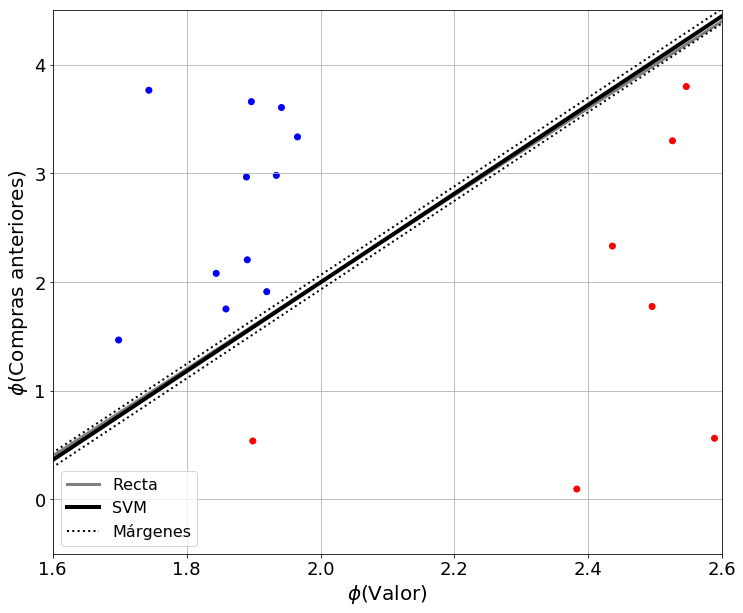

In [4]:
# Plot the validation points
plt.figure(figsize=(12,10))
plt.scatter(Xi_v[:,0], Xi_v[:,1],c=yi_v,marker='o',cmap=cm.bwr)
plt.plot(x1,y1,'gray',label='Recta',linewidth=3)  

# Plot the plane find by the SVM train
x2 = np.linspace(1,3,20)
y2 = (1/w[1])*(-w[2] -(w[0])*x2)
plt.plot(x2,y2,'k',label='SVM',linewidth=4)


# Plot the margins
YUP=(1-w[0]*x2-w[2])/w[1] #Margin 
plt.plot(x2,YUP,'k:',label = 'Márgenes',linewidth=2) 
YLOW=(-1-w[0]*x2-w[2])/w[1]     #Margin 
plt.plot(x2,YLOW,'k:',linewidth=2) 
plt.grid()
plt.legend(loc='best',prop={'size': 16})
plt.axis([1.6,2.6,-0.5,4.5])
plt.xlabel('$\phi$(Valor)',fontsize = 20)
plt.ylabel('$\phi$(Compras anteriores)',fontsize = 20)
plt.show()

## Ejemplo de clasificador lineal con variables no separables

Se cambia de clase de algunos datos de entrenamiento

In [5]:
# Clasificando los puntos en sus respectivas clases

nt2 = int(0.5*nt)                     # Se cambia de clase los datos de entrenamiento
yi2_t = yi_t

for i in range(nt2):
    if i<=(nt2/2):
        yi2_t[i] = np.sign((wt[0])*(Xi_t[i,0]-0.3)+wt[1]*Xi_t[i,1]+bt)
    else:
        yi2_t[i] = np.sign((wt[0])*(Xi_t[i,0]+0.3)+wt[1]*Xi_t[i,1]+bt)

Se declaran las matrices que se requieren para resolver el problema de optimización asociado al SVM.

Se usa la librería `cvxopt` para resolver el problema de optimización cuadrática.

In [13]:
#Preparing matrices for solve the optimization problem
c2 = 50                   #penality
P2 = matrix(np.r_[np.c_[np.eye(m),np.zeros((m,nt+1))],np.zeros((1+nt,m+nt+1))])
q2 = matrix(c2*np.r_[np.zeros((m+1,1)),np.ones((nt,1))])
G2 = matrix(-(np.diag(yi2_t)@(np.c_[Xi_t,np.ones((nt,1)),np.zeros((nt,nt))]) + np.c_[np.zeros((nt,m+1)),np.eye(nt)]))
h2 = matrix(-np.ones((nt,1)))
# Se agregan cotas superiores e inferiores para las variables "slack"
LB2 = -np.zeros((nt,1))
#UB2 = 100*np.ones((nt,1))
I2 = -matrix(np.c_[np.zeros((nt,m+1)),np.eye(nt)])
G2 = matrix(np.r_[G2,I2])
h2 = matrix(np.r_[h2,LB2])

sol=solvers.qp(P2, q2, G2, h2)
w2 = np.array(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -8.6543e+05  4.1490e+05  1e+06  1e+02  9e+00
 1: -3.0666e+04 -5.2092e+04  2e+05  1e+01  1e+00
 2:  1.0326e+03 -8.0890e+03  3e+04  2e+00  1e-01
 3:  3.4074e+03  8.8591e+01  7e+03  2e-01  2e-02
 4:  2.5361e+03  9.6735e+02  3e+03  1e-01  8e-03
 5:  2.5190e+03  1.1784e+03  2e+03  5e-02  4e-03
 6:  2.5735e+03  1.3333e+03  2e+03  3e-02  3e-03
 7:  2.3527e+03  1.4351e+03  1e+03  1e-02  1e-03
 8:  2.1049e+03  1.5320e+03  6e+02  5e-03  4e-04
 9:  1.9937e+03  1.6127e+03  4e+02  3e-03  2e-04
10:  1.9746e+03  1.6123e+03  4e+02  2e-03  2e-04
11:  1.8797e+03  1.6659e+03  2e+02  1e-03  1e-04
12:  1.8355e+03  1.6810e+03  2e+02  2e-04  2e-05
13:  1.8036e+03  1.6997e+03  1e+02  1e-04  9e-06
14:  1.7515e+03  1.7383e+03  1e+01  2e-06  2e-07
15:  1.7447e+03  1.7444e+03  3e-01  5e-08  4e-09
16:  1.7445e+03  1.7445e+03  3e-03  5e-10  4e-11
17:  1.7445e+03  1.7445e+03  3e-05  5e-12  4e-13
Optimal solution found.


Se proce a graficar el hiperplano separador encontrado por el problema de optimización junto al conjunto de datos de entrenamiento.

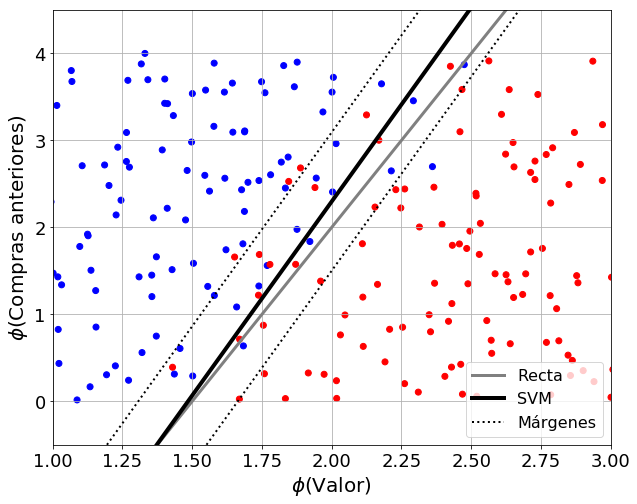

In [14]:
# Plot the training points
plt.figure(figsize=(10,8))
plt.scatter(Xi_t[:,0], Xi_t[:,1],c=yi2_t,marker='o',cmap=cm.bwr)
plt.plot(x1,y1,'gray',label='Recta',linewidth=3) 

# Plot the plane find by the SVM train
x2 = np.linspace(1,3,20)
y2 = (1/w2[1])*(-w2[2] -(w2[0])*x2)
plt.plot(x2,y2,'k',label='SVM',linewidth=4)

# Plot the margins
YUP=(1-w2[0]*x2-w2[2])/w2[1] #Margin 
plt.plot(x2,YUP,'k:',label = 'Márgenes',linewidth=2) 
YLOW=(-1-w2[0]*x2-w2[2])/w2[1]     #Margin 
plt.plot(x2,YLOW,'k:',linewidth=2) 
plt.grid()
plt.legend(loc='best',prop={'size': 16})
plt.axis([1,3,-0.5,4.5])
plt.xlabel('$\phi$(Valor)',fontsize = 20)
plt.ylabel('$\phi$(Compras anteriores)',fontsize = 20)
plt.show()

Se grafican los datos de validación y el hiperplano separador.

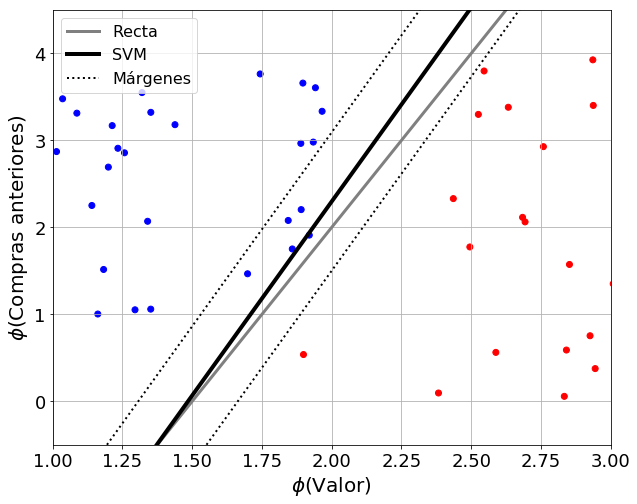

In [8]:
# Plot the validation points
plt.figure(figsize=(10,8))
plt.scatter(Xi_v[:,0], Xi_v[:,1],c=yi_v,marker='o',cmap=cm.bwr)
plt.plot(x1,y1,'gray',label='Recta',linewidth=3) 

# Plot the plane find by the SVM train
x2 = np.linspace(1,3,20)
y2 = (1/w2[1])*(-w2[2] -(w2[0])*x2)
plt.plot(x2,y2,'k',label='SVM',linewidth=4)


# Plot the margins
YUP=(1-w2[0]*x2-w2[2])/w2[1] #Margin 
plt.plot(x2,YUP,'k:',label = 'Márgenes',linewidth=2) 
YLOW=(-1-w2[0]*x2-w2[2])/w2[1]     #Margin 
plt.plot(x2,YLOW,'k:',linewidth=2) 
plt.grid()
plt.legend(loc='best',prop={'size': 16})
plt.axis([1,3,-0.5,4.5])
plt.xlabel('$\phi$(Valor)',fontsize = 20)
plt.ylabel('$\phi$(Compras anteriores)',fontsize = 20)
plt.show()